In [1]:
#importing the requried labraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\yasha\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
##importing the data

data = pd.read_csv('household_power_consumption.csv', sep=';')

C:\Users\yasha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [4]:
# here we are taking only 50000 data from large dataset

df = data.sample(50000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 2047321 to 1961892
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   50000 non-null  object 
 1   Time                   50000 non-null  object 
 2   Global_active_power    50000 non-null  object 
 3   Global_reactive_power  50000 non-null  object 
 4   Voltage                50000 non-null  object 
 5   Global_intensity       50000 non-null  object 
 6   Sub_metering_1         50000 non-null  object 
 7   Sub_metering_2         50000 non-null  object 
 8   Sub_metering_3         49372 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2047321,7/11/2010,11:25:00,2.166,0.144,232.6,9.2,0.0,0.0,18.0
553398,5/1/2008,00:42:00,0.364,0.102,243.200,1.600,0.000,1.000,0.0
697105,13/4/2008,19:49:00,2.070,0.136,238.090,8.800,0.000,19.000,1.0
1201002,29/3/2009,18:06:00,1.560,0.080,237.300,6.600,0.000,1.000,17.0
1904189,31/7/2010,01:53:00,0.322,0.210,238.150,1.600,0.000,0.000,1.0


In [7]:
df.drop(columns=['Date','Time'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           628
dtype: int64

In [9]:
df['Global_active_power'].unique()

array([2.166, '0.364', '2.070', ..., '4.392', '4.174', 2.238],
      dtype=object)

In [10]:
df['Global_reactive_power'].unique()

array([0.144, '0.102', '0.136', '0.080', '0.210', '0.092', '0.094',
       '0.188', '0.316', 0.058, '0.470', '0.140', '0.182', '0.144',
       '0.000', '0.224', '0.416', '0.320', '0.078', '0.180', '0.116',
       '0.104', '0.132', '0.214', '0.206', '0.108', '0.184', '0.240',
       '0.114', '0.062', '0.326', '0.058', '0.158', '0.072', '0.100',
       '0.176', 0.21, '0.076', 0.106, '0.166', '0.088', '0.056', 0.166,
       '0.068', '0.090', '0.522', '0.164', '0.066', '0.054', 0.524,
       '0.262', '0.390', '0.050', '0.218', '0.198', '0.146', '0.128', 0.1,
       '0.204', '0.202', '0.110', '0.086', '?', '0.120', '0.306', '0.226',
       '0.288', '0.382', '0.126', '0.096', '0.516', '0.162', '0.112', 0.0,
       '0.252', '0.194', '0.156', '0.122', '0.160', '0.264', '0.174',
       '0.168', '0.134', '0.070', '0.098', '0.082', '0.338', '0.260',
       '0.200', 0.236, '0.308', '0.220', '0.266', '0.362', '0.254',
       '0.118', '0.142', '0.084', '0.208', '0.474', '0.192', '0.256',
       '0.3

In [11]:
df['Global_intensity'].unique()

array([9.2, '1.600', '8.800', '6.600', '1.200', '16.600', '6.000',
       '18.600', 3.8, '5.800', '5.200', '12.000', '8.600', '7.000',
       '10.400', '2.400', '11.000', '5.400', '1.400', '7.400', '4.000',
       '18.200', '5.600', '15.200', '2.200', '14.400', 1.8, '20.400',
       12.8, '3.200', '0.600', '8.000', '0.800', '11.600', '13.200',
       '9.000', '1.000', '5.000', '0.400', '9.400', 8.6, '2.000',
       '13.400', '9.800', 1.4, '?', '8.400', '11.200', '2.800', '4.200',
       '7.200', '4.400', 1.0, '7.800', '3.800', '6.200', '15.400',
       '0.200', '3.400', '3.600', '4.800', '6.400', '7.600', 3.4, '8.200',
       '4.600', '2.600', '9.600', '15.000', '9.200', '1.800', '12.800',
       '15.600', '10.800', '20.000', '11.400', '10.600', '21.800',
       '31.800', '3.000', '14.800', '10.000', '19.800', '19.000', 8.4,
       '16.000', '12.600', 6.6, '6.800', '19.400', '13.000', '15.800',
       '10.200', '12.400', '32.000', '22.600', '18.000', '13.800',
       '17.000', '13.600'

In [12]:
df['Voltage'].unique()

array([232.6, '243.200', '238.090', ..., 242.47, 235.7, 244.64],
      dtype=object)

In [13]:
df['Sub_metering_1'].unique()

array([0.0, '0.000', '38.000', '2.000', '8.000', '46.000', '1.000',
       '32.000', '37.000', '?', '36.000', '12.000', '29.000', '44.000',
       '6.000', '4.000', '28.000', '39.000', '26.000', '11.000', '3.000',
       '34.000', '5.000', '31.000', '30.000', 1.0, '27.000', 2.0,
       '24.000', '35.000', '10.000', '7.000', 17.0, '9.000', '23.000',
       '14.000', 7.0, '16.000', '21.000', '45.000', '40.000', '33.000',
       '56.000', '72.000', '17.000', '15.000', '13.000', '25.000',
       '71.000', '22.000', '20.000', 80.0, '55.000', '74.000', '18.000',
       '50.000', '76.000', 36.0, '51.000', '19.000', '43.000', 14.0,
       '75.000', 37.0, 79.0, '49.000', 8.0, '42.000', '53.000', 30.0,
       57.0, 15.0, '41.000', '64.000', 6.0, '73.000', 45.0, 33.0, 38.0,
       39.0, 21.0, 31.0, 32.0, '62.000'], dtype=object)

In [14]:
df['Sub_metering_2'].unique()

array([0.0, '1.000', '19.000', '0.000', '28.000', '2.000', '35.000',
       '29.000', '37.000', 1.0, '16.000', '40.000', '?', '27.000',
       '20.000', '39.000', '3.000', '36.000', '76.000', '8.000', '71.000',
       '18.000', '60.000', '38.000', '17.000', '5.000', '26.000', 23.0,
       '11.000', '64.000', 2.0, '25.000', '10.000', '14.000', '32.000',
       '4.000', '24.000', '15.000', '34.000', '74.000', 38.0, '30.000',
       '70.000', '31.000', '72.000', '33.000', '6.000', 37.0, '23.000',
       '69.000', 24.0, '9.000', '22.000', '21.000', '13.000', '67.000',
       '65.000', '63.000', '56.000', '68.000', '43.000', '73.000', 4.0,
       '48.000', 26.0, 64.0, 22.0, '7.000', '79.000', '54.000', 21.0,
       '75.000', 31.0, '12.000', 39.0, '62.000', 66.0, '78.000', 10.0,
       '52.000', '49.000', 40.0, '59.000', '51.000', '50.000', '41.000',
       3.0, 5.0, '58.000'], dtype=object)

In [15]:
df['Sub_metering_3'].unique()

array([18.,  0.,  1., 17., 19., 13., 12., 11., 16., nan, 29., 23., 31.,
       10.,  9.,  2.,  5., 30.,  8., 27.,  4., 14.,  3., 20.,  7., 22.,
        6., 28., 21., 25., 15., 26., 24.])

In [16]:
# check for the unwanted data in data set

df.loc[df['Global_active_power'] == '?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1988946,?,?,?,?,?,?,NaN
1714603,?,?,?,?,?,?,NaN
192042,?,?,?,?,?,?,NaN
1989807,?,?,?,?,?,?,NaN
1988138,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...
1311794,?,?,?,?,?,?,NaN
1310406,?,?,?,?,?,?,NaN
1618328,?,?,?,?,?,?,NaN
1935714,?,?,?,?,?,?,NaN


In [17]:
# removing the unwanted data from dataset 

df.drop(df.loc[df['Global_active_power'] == '?'].index , inplace=True)

In [18]:
df.loc[df['Global_active_power'] == '?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49372 entries, 2047321 to 1961892
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49372 non-null  object 
 1   Global_reactive_power  49372 non-null  object 
 2   Voltage                49372 non-null  object 
 3   Global_intensity       49372 non-null  object 
 4   Sub_metering_1         49372 non-null  object 
 5   Sub_metering_2         49372 non-null  object 
 6   Sub_metering_3         49372 non-null  float64
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


In [20]:
# converting the features to float which are in object datatype

df = df.astype({'Global_active_power':float, 'Global_reactive_power':float, 'Voltage':float, 'Global_intensity':float, 'Sub_metering_1':float, 'Sub_metering_2':float})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49372 entries, 2047321 to 1961892
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49372 non-null  float64
 1   Global_reactive_power  49372 non-null  float64
 2   Voltage                49372 non-null  float64
 3   Global_intensity       49372 non-null  float64
 4   Sub_metering_1         49372 non-null  float64
 5   Sub_metering_2         49372 non-null  float64
 6   Sub_metering_3         49372 non-null  float64
dtypes: float64(7)
memory usage: 3.0 MB


In [22]:
# adding the 3 features to convert into single features 

df['Sub_metering'] = df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']

In [23]:
# droping the unwanted features

df.drop(columns=['Sub_metering_1','Sub_metering_2','Sub_metering_3'], axis=1, inplace=True)

In [24]:
#in clean data again checking for any null values

df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering             0
dtype: int64

In [25]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering
2047321,2.166,0.144,232.60,9.2,18.0
553398,0.364,0.102,243.20,1.6,1.0
697105,2.070,0.136,238.09,8.8,20.0
1201002,1.560,0.080,237.30,6.6,18.0
1904189,0.322,0.210,238.15,1.6,1.0
...,...,...,...,...,...
1460539,0.662,0.000,247.05,2.6,1.0
42228,1.388,0.126,243.45,5.6,19.0
618492,0.252,0.000,242.31,1.0,0.0
1005548,0.392,0.092,245.32,1.6,0.0


In [26]:
# spliting  the entire dataset to train and test

x = df.drop(columns='Sub_metering',axis = 1)
y = df['Sub_metering']

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state= 5)

In [28]:
x_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
1729036,1.310,0.000,242.09,5.4
901799,0.540,0.052,244.65,2.2
94078,2.300,0.000,239.63,9.6
852519,0.432,0.110,238.69,2.0
1543028,0.256,0.000,244.46,1.2


In [29]:
y_train.head()

1729036    19.0
901799      1.0
94078       0.0
852519      3.0
1543028     1.0
Name: Sub_metering, dtype: float64

In [30]:
# importing the DT Regressor

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [31]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [32]:
# Accuracy for train data

model.score(x_train, y_train) # if it is near to 1 then the model is overfitted

0.9999950736206531

[Text(0.5, 0.9166666666666666, 'X[0] <= 1.195\nsquared_error = 162.617\nsamples = 33079\nvalue = 8.808'),
 Text(0.25, 0.75, 'X[0] <= 0.831\nsquared_error = 5.496\nsamples = 19432\nvalue = 1.187'),
 Text(0.125, 0.5833333333333334, 'X[1] <= 0.137\nsquared_error = 1.306\nsamples = 17928\nvalue = 0.833'),
 Text(0.0625, 0.4166666666666667, 'X[1] <= 0.071\nsquared_error = 0.851\nsamples = 12581\nvalue = 0.609'),
 Text(0.03125, 0.25, 'X[3] <= 3.7\nsquared_error = 0.468\nsamples = 6517\nvalue = 0.427'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'X[3] <= 2.9\nsquared_error = 1.19\nsamples = 6064\nvalue = 0.804'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'X[3] <= 3.1\nsquared_error = 1.981\nsamples = 5347\nvalue = 1.36'),
 Text(0.15625, 0.25, 'X[1] <= 0.233\nsquared_error = 1.144\nsamples = 4988\nvalue = 1.

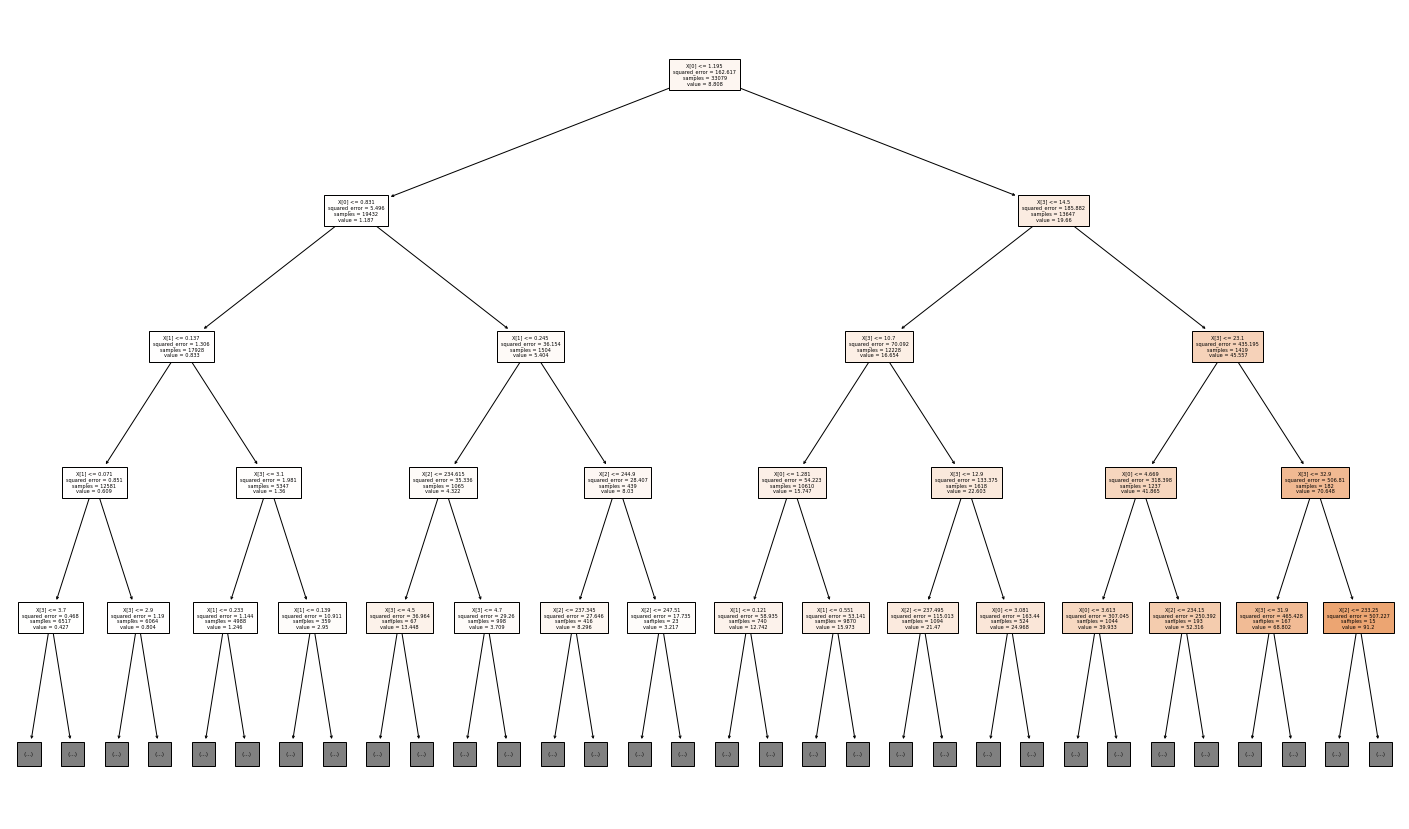

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4, filled=True,fontsize=5)

In [34]:
y_pred = model.predict(x_test)

In [35]:
# for regression checing for the accuracy

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
score

0.5652806558234678

In [36]:
adjusted_R_square = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
adjusted_R_square

0.5651738976348193

In [43]:
# for better perfromance of model we are doing hyperparameter tuning using gridsearchcv 

grid_param = {
    'criterion' : ['squared_error'],
    'max_depth' : range(1,6),
    'min_samples_leaf' : range(1,8),
    'min_samples_split' : range(2,8),
    'splitter' : ['best','random']
 }

In [44]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = model, param_grid = grid_param, cv=5)

In [45]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']})

In [46]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [47]:
# taking the best parameter

model_with_best_param = DecisionTreeRegressor(criterion='squared_error',
 max_depth = 5,
 min_samples_leaf = 4,
 min_samples_split = 2,
 splitter = 'best' )

In [48]:
model_with_best_param.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)

In [49]:
y_predict2 = model_with_best_param.predict(x_test)

In [50]:
# accuracy after the hyper 
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
score

0.5652806558234678

In [ ]:
Conclusion by using hyperparameter also getting the same accuaray